In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud
import plotly.express as px

# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
# Замените путь на свой при загрузке файла
df = pd.read_csv("games_description.csv")

# Быстрый осмотр
print(df.shape)
print(df.dtypes)


(290, 13)
name                                       object
short_description                          object
long_description                           object
genres                                     object
minimum_system_requirement                 object
recommend_system_requirement               object
release_date                               object
developer                                  object
publisher                                  object
overall_player_rating                      object
number_of_reviews_from_purchased_people    object
number_of_english_reviews                  object
link                                       object
dtype: object


In [3]:
df.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [4]:
# Преобразуем даты
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Преобразуем genres в список
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Обработка числовых столбцов
numeric_columns = ['number_of_reviews_from_purchased_people',
                   'number_of_english_reviews']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [5]:
print(f"🔹 Всего уникальных игр: {df['name'].nunique()}")


🔹 Всего уникальных игр: 290


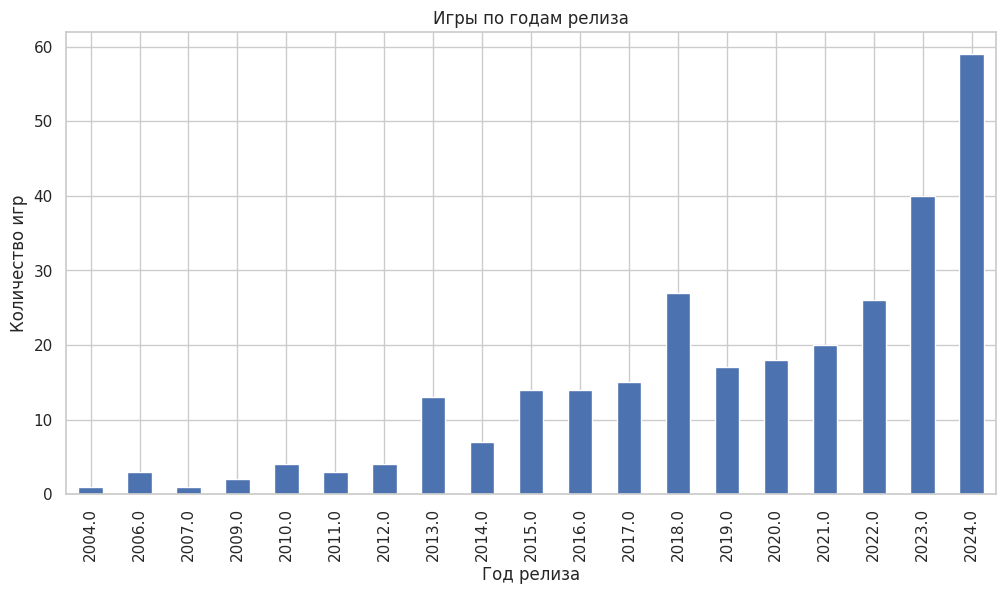

In [6]:
df['release_year'] = df['release_date'].dt.year

df['release_year'].value_counts().sort_index().plot(kind='bar', title='Игры по годам релиза')
plt.ylabel("Количество игр")
plt.xlabel("Год релиза")
plt.show()


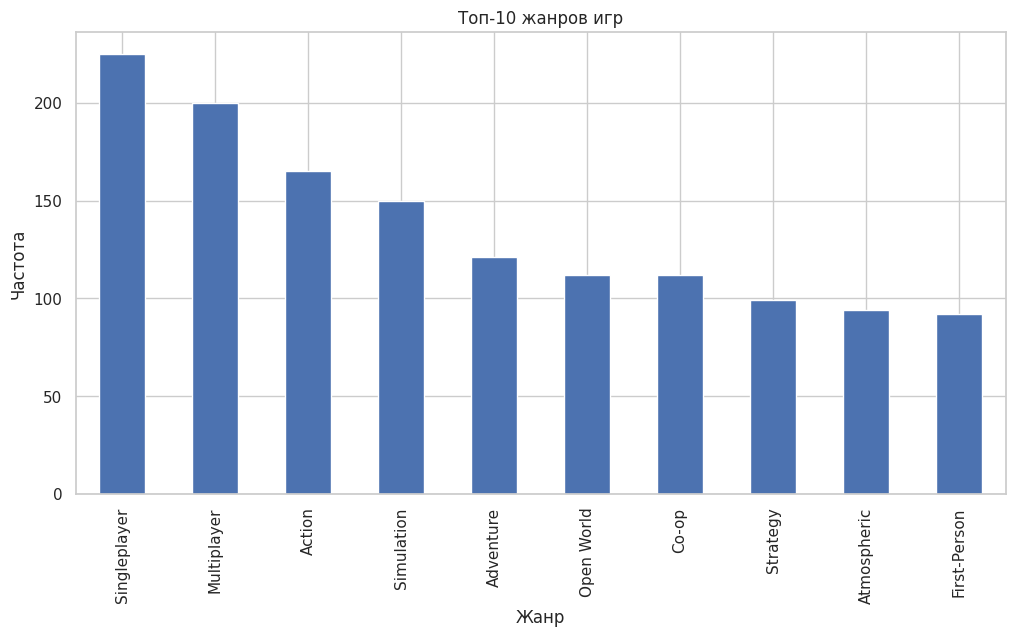

In [7]:
from collections import Counter

genre_counts = Counter([genre for genres in df['genres'] for genre in genres])
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', title='Топ-10 жанров игр')
plt.ylabel("Частота")
plt.xlabel("Жанр")
plt.show()


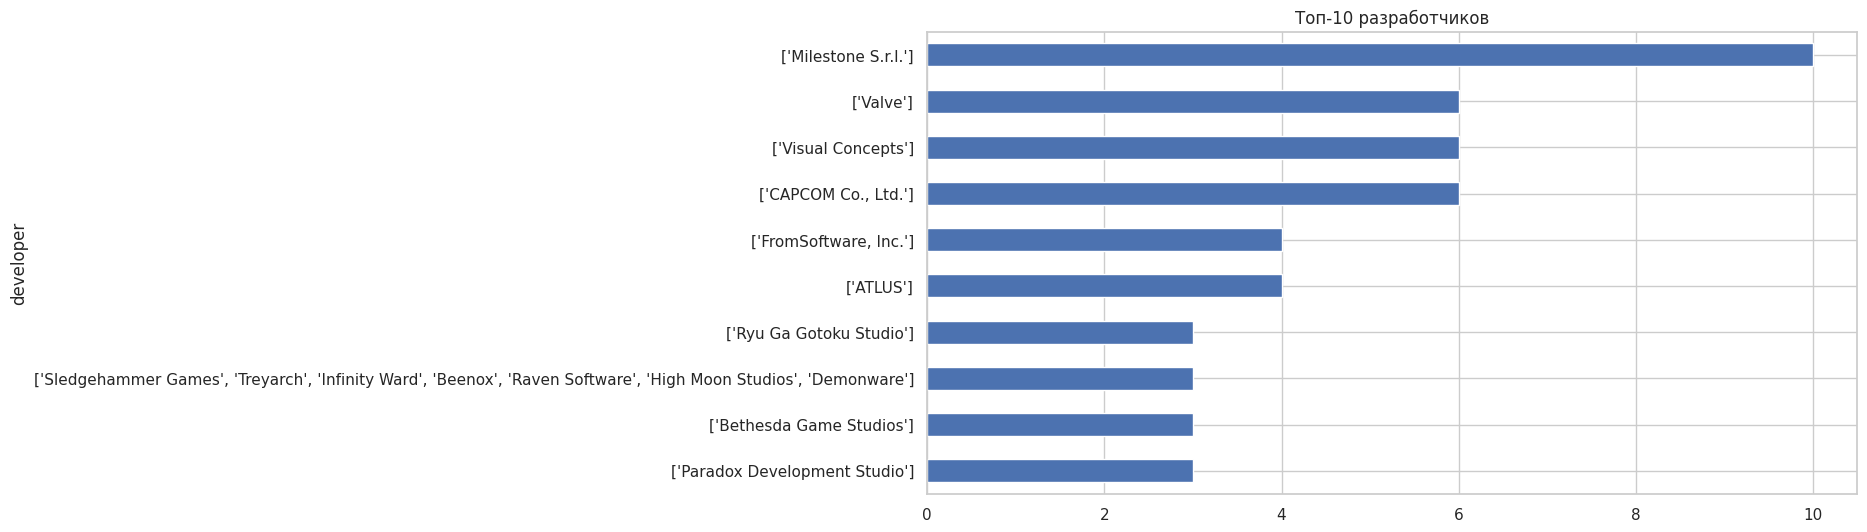

In [8]:
top_devs = df['developer'].value_counts().head(10)

top_devs.plot(kind='barh', title="Топ-10 разработчиков")
plt.gca().invert_yaxis()
plt.show()


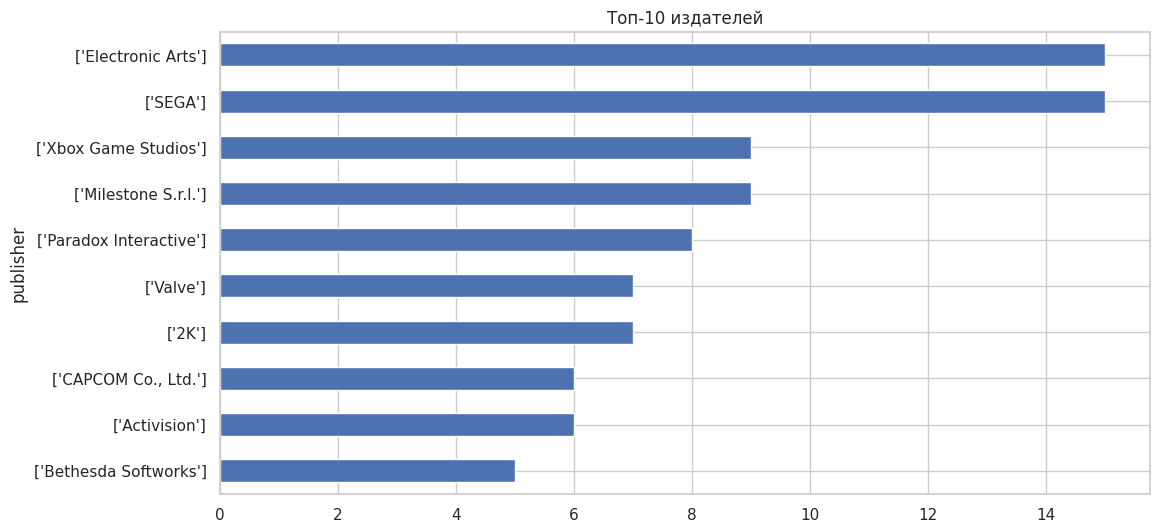

In [9]:
top_pubs = df['publisher'].value_counts().head(10)

top_pubs.plot(kind='barh', title="Топ-10 издателей")
plt.gca().invert_yaxis()
plt.show()


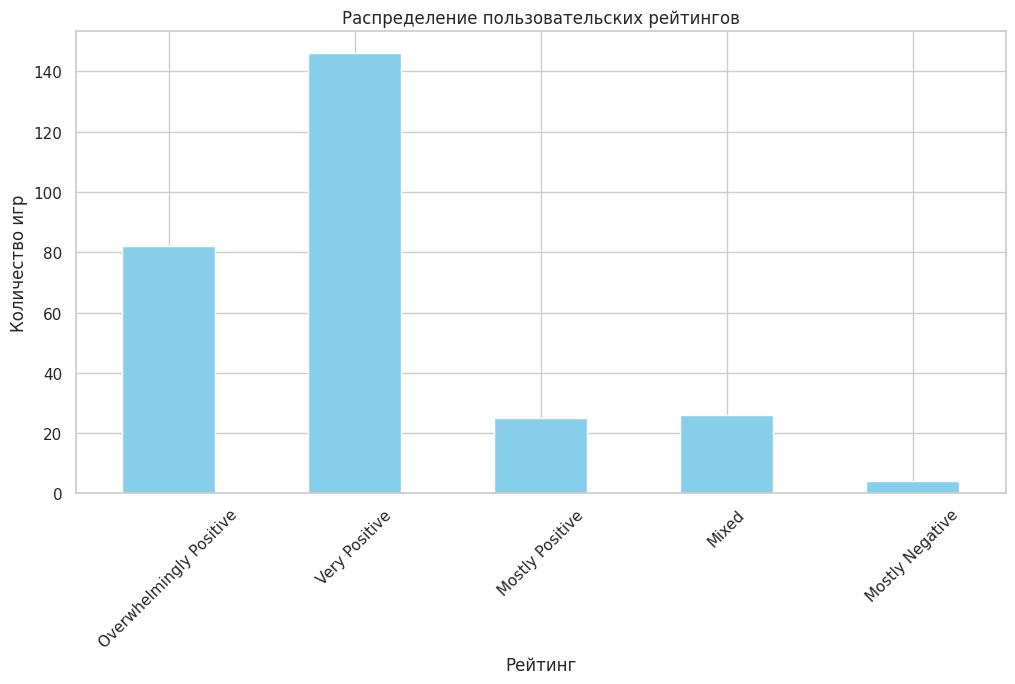

In [10]:
# Подсчёт частот по категориям рейтинга
rating_counts = df['overall_player_rating'].value_counts().reindex([
    'Overwhelmingly Positive',
    'Very Positive',
    'Mostly Positive',
    'Mixed',
    'Mostly Negative'
])

rating_counts.plot(kind='bar', color='skyblue')
plt.title("Распределение пользовательских рейтингов")
plt.ylabel("Количество игр")
plt.xlabel("Рейтинг")
plt.xticks(rotation=45)
plt.show()


In [11]:
print(df['overall_player_rating'].unique())


['Overwhelmingly Positive' 'Very Positive' 'Mixed' 'Mostly Positive'
 'Mostly Negative' 'Very Negative' '7 user reviews' 'Positive'
 '1 user reviews' '6 user reviews' '4 user reviews']


In [15]:
# Список допустимых рейтингов
valid_ratings = [
    'Overwhelmingly Positive',
    'Very Positive',
    'Mostly Positive',
    'Mixed',
    'Mostly Negative',
    'Very Negative',
    'Positive',
    '7 user reviews',
    '1 user reviews',
    '6 user reviews',
    '4 user reviews'
]

# Фильтруем только допустимые категории
df_filtered = df[df['overall_player_rating'].isin(valid_ratings)]

# Считаем количество для каждого рейтинга и выводим в виде таблицы
rating_counts = df_filtered['overall_player_rating'].value_counts().reindex(valid_ratings).fillna(0).astype(int)

# Выводим красиво
rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['Рейтинг', 'Количество игр']

print(rating_counts_df)


                    Рейтинг  Количество игр
0   Overwhelmingly Positive              82
1             Very Positive             146
2           Mostly Positive              25
3                     Mixed              26
4           Mostly Negative               4
5             Very Negative               2
6                  Positive               1
7            7 user reviews               1
8            1 user reviews               1
9            6 user reviews               1
10           4 user reviews               1


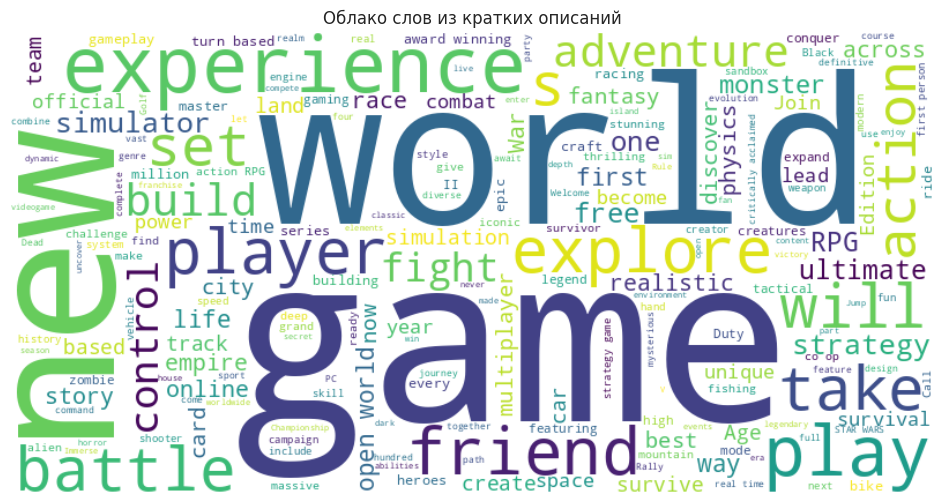

In [12]:
text = " ".join(df['short_description'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако слов из кратких описаний")
plt.show()
